In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [4]:
dataset = pd.read_csv(r"student_placement_dataset_1000.csv")
dataset.head(3)

,cgpa,score,placed
0,6.69,5.43,0
1,9.28,7.21,1
2,8.29,8.86,1


In [5]:
dataset.isnull().sum()

cgpa      0
score     0
placed    0
dtype: int64

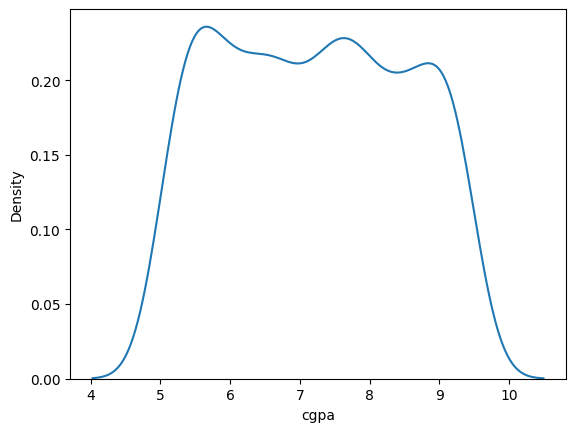

In [11]:
sns.kdeplot(data=dataset["cgpa"])
plt.show()

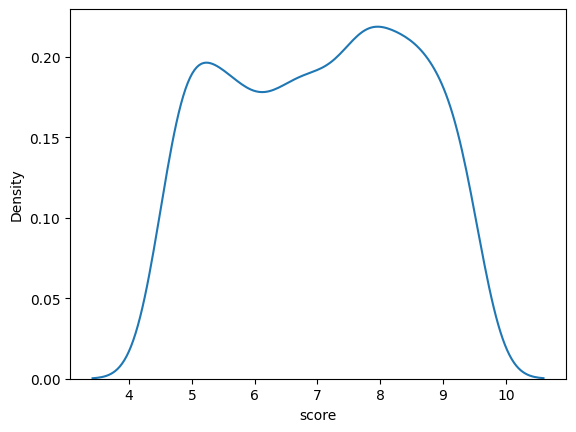

In [12]:
sns.kdeplot(data=dataset["score"])
plt.show()

“Since cgpa and score are continuous features with approximately normal distributions, Gaussian Naive Bayes is suitable even though the data is not linearly separable.”

1️⃣ KDE plots for cgpa and score

From your graphs:

Both cgpa and score look continuous

Their distributions are smooth and bell-shaped-ish

This is perfect for Gaussian Naive Bayes, which assumes:

Each feature follows a normal (Gaussian) distribution within each class

Even if it’s not perfectly normal, Gaussian NB is very forgiving.

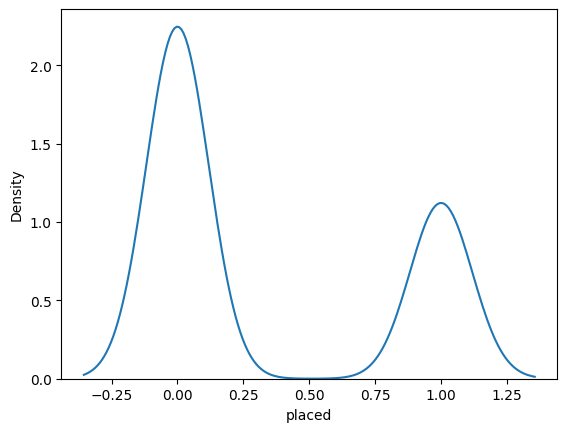

In [13]:
sns.kdeplot(data=dataset["placed"])
plt.show()

### Checking is it linearly seprable or non linearly seprable

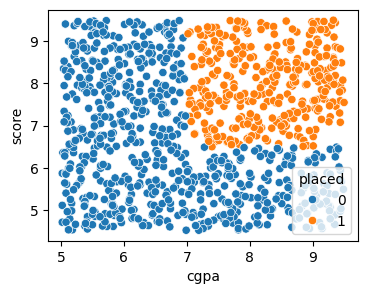

In [7]:
plt.figure(figsize=(4,3))
sns.scatterplot(x="cgpa", y="score", data = dataset, hue="placed")
plt.show()

In [8]:
x = dataset.iloc[:,:-1]
y = dataset["placed"]

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [14]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [15]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

,"priors priors: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None
,"var_smoothing var_smoothing: float, default=1e-9Portion of the largest variance of all features that is added tovariances for calculation stability... versionadded:: 0.20",1e-09


In [ ]:
gnb.score(x_test, y_test)*100, gnb.score(x_train, y_train)*100

#means accuracy is good 94.5, 93.875

(94.5, 93.875)

In [18]:
mnb = MultinomialNB()
mnb.fit(x_train,y_train)

,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


In [20]:
mnb.score(x_test, y_test)*100, mnb.score(x_train, y_train)*100

(70.5, 65.75)

In [22]:
bnb = BernoulliNB()
bnb.fit(x_train, y_train)

,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"binarize binarize: float or None, default=0.0Threshold for binarizing (mapping to booleans) of sample features.If None, input is presumed to already consist of binary vectors.",0.0
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


In [24]:
bnb.score(x_test, y_test)*100, bnb.score(x_train, y_train)*100

(70.5, 65.75)

C:\Users\shali\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


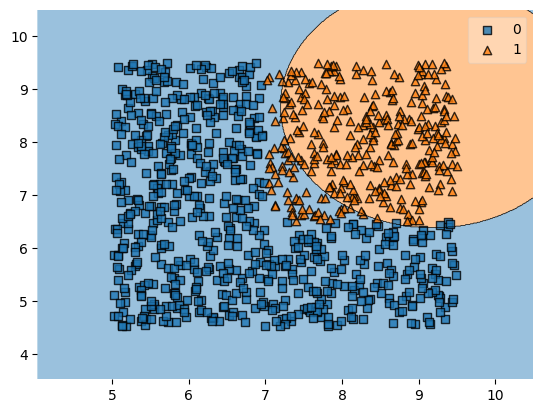

In [25]:
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf = gnb)
plt.show()

C:\Users\shali\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


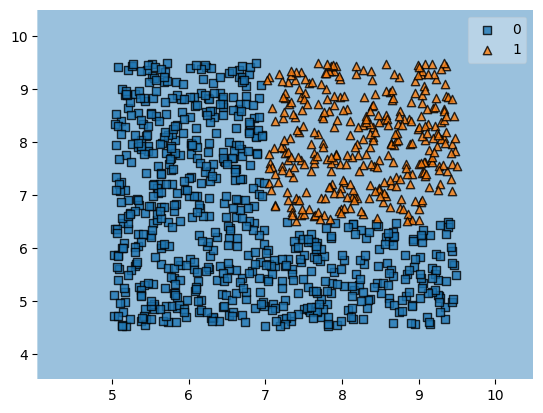

In [26]:
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf = mnb)
plt.show()

C:\Users\shali\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


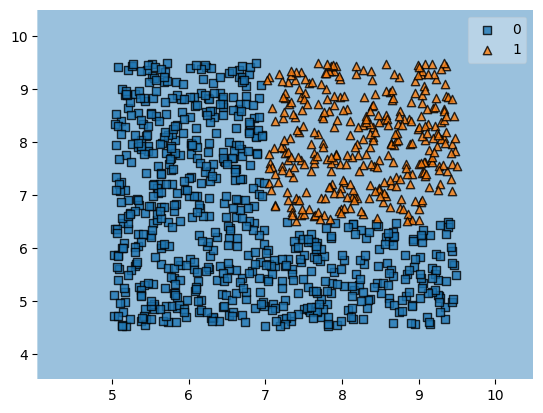

In [27]:
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf = bnb)
plt.show()